# Libraries

In [1]:
import pandas as pd
import numpy as np
import os

from typing import List, Dict, Tuple, Optional, Any
from datetime import datetime
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import zscore
from scipy.stats import stats
from statsmodels.tsa.stattools import pacf

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading and analyzing the Datasets

In [3]:
folder_path = "/content/drive/MyDrive/train_splits"

In [4]:
files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
files

['train_103.csv',
 'train_110.csv',
 'train_338.csv',
 'train_198.csv',
 'train_256.csv',
 'train_218.csv',
 'train_153.csv',
 'train_386.csv',
 'train_211.csv',
 'train_227.csv',
 'train_131.csv',
 'train_151.csv',
 'train_294.csv',
 'train_361.csv',
 'train_118.csv',
 'train_335.csv',
 'train_301.csv',
 'train_165.csv',
 'train_177.csv',
 'train_352.csv',
 'train_321.csv',
 'train_348.csv',
 'train_383.csv',
 'train_325.csv',
 'train_188.csv',
 'train_242.csv',
 'train_185.csv',
 'train_212.csv',
 'train_246.csv',
 'train_200.csv',
 'train_272.csv',
 'train_287.csv',
 'train_115.csv',
 'train_209.csv',
 'train_119.csv',
 'train_506.csv',
 'train_217.csv',
 'train_439.csv',
 'train_12.csv',
 'train_43.csv',
 'train_23.csv',
 'train_495.csv',
 'train_469.csv',
 'train_205.csv',
 'train_297.csv',
 'train_483.csv',
 'train_141.csv',
 'train_507.csv',
 'train_74.csv',
 'train_176.csv',
 'train_155.csv',
 'train_300.csv',
 'train_21.csv',
 'train_447.csv',
 'train_306.csv',
 'train_9.csv',

In [5]:
dataframes = {file.split('.')[0]: pd.read_csv(os.path.join(folder_path, file)) for file in files}

In [6]:
dataset_id = list(dataframes.keys())[0]
dataframes[dataset_id].head()

,value,timestamp,anomaly
0,0.442091,2021-07-01 00:00:00,False
1,0.437336,2021-07-01 06:00:00,False
2,0.427584,2021-07-01 12:00:00,False
3,0.395056,2021-07-01 18:00:00,False
4,-0.384495,2021-07-02 00:00:00,False


In [7]:
dataset_id = list(dataframes.keys())[1]
dataframes[dataset_id].head(10)

,value,timestamp,anomaly
0,0.459726,2021-07-01 00:00:00,False
1,0.208189,2021-07-01 06:00:00,True
2,0.530672,2021-07-01 12:00:00,False
3,0.448953,2021-07-01 18:00:00,False
4,-0.439928,2021-07-02 00:00:00,False
5,-0.472273,2021-07-02 06:00:00,False
6,-0.483305,2021-07-02 12:00:00,False
7,-0.445376,2021-07-02 18:00:00,False
8,-0.985939,2021-07-03 00:00:00,False
9,-0.897069,2021-07-03 06:00:00,False


In [8]:
dataset_id = list(dataframes.keys())[90]
dataframes[dataset_id].head(10)

,value,timestamp
0,0.469227,2021-07-01 00:00:00
1,0.476073,2021-07-01 08:00:00
2,0.482422,2021-07-01 16:00:00
3,-0.461317,2021-07-02 00:00:00
4,-0.454246,2021-07-02 08:00:00
5,-0.467749,2021-07-02 16:00:00
6,-1.021675,2021-07-03 00:00:00
7,-0.979246,2021-07-03 08:00:00
8,-1.256890,2021-07-03 16:00:00
9,-0.952582,2021-07-04 00:00:00


In [ ]:
dataset_id = list(dataframes.keys())[60]
dataframes[dataset_id].head()

,value,timestamp
0,-0.456892,2021-07-01 00:00:00
1,-0.498323,2021-07-01 00:10:00
2,-0.446241,2021-07-01 00:20:00
3,-0.804779,2021-07-01 00:30:00
4,-0.669854,2021-07-01 00:40:00


In [9]:
dataset_id = list(dataframes.keys())[80]
dataframes[dataset_id].head()

,value,timestamp
0,-0.251747,2021-07-01 00:00:00
1,-0.310574,2021-07-01 00:30:00
2,NaN,2021-07-01 01:00:00
3,-0.100167,2021-07-01 01:30:00
4,0.094093,2021-07-01 02:00:00


In [10]:
dataset_sizes = [df.shape[0] for df in dataframes.values()]
for i, size in enumerate(dataset_sizes):
    print(f"Dataset {i+1}: {size} rows")

Dataset 1: 252 rows
Dataset 2: 672 rows
Dataset 3: 3024 rows
Dataset 4: 15120 rows
Dataset 5: 30240 rows
Dataset 6: 15120 rows
Dataset 7: 504 rows
Dataset 8: 30240 rows
Dataset 9: 24192 rows
Dataset 10: 36792 rows
Dataset 11: 9072 rows
Dataset 12: 441 rows
Dataset 13: 1008 rows
Dataset 14: 5544 rows
Dataset 15: 15120 rows
Dataset 16: 5040 rows
Dataset 17: 42 rows
Dataset 18: 1022 rows
Dataset 19: 15120 rows
Dataset 20: 12264 rows
Dataset 21: 8064 rows
Dataset 22: 252 rows
Dataset 23: 5040 rows
Dataset 24: 5544 rows
Dataset 25: 189 rows
Dataset 26: 12096 rows
Dataset 27: 672 rows
Dataset 28: 3024 rows
Dataset 29: 168 rows
Dataset 30: 9072 rows
Dataset 31: 7056 rows
Dataset 32: 10080 rows
Dataset 33: 630 rows
Dataset 34: 15120 rows
Dataset 35: 42 rows
Dataset 36: 189 rows
Dataset 37: 105 rows
Dataset 38: 168 rows
Dataset 39: 18144 rows
Dataset 40: 252 rows
Dataset 41: 1022 rows
Dataset 42: 9072 rows
Dataset 43: 210 rows
Dataset 44: 12264 rows
Dataset 45: 105 rows
Dataset 46: 12264 rows
D

In [11]:
print(f"Maximum dataset size: {max(dataset_sizes)} rows")
print(f"Minimum dataset size: {min(dataset_sizes)} rows")

Maximum dataset size: 36792 rows
Minimum dataset size: 42 rows


In [12]:
# Count datasets with both 'value' and 'timestamp' columns
valid_datasets_count = sum(
    {'value', 'timestamp'}.issubset(df.columns) for df in dataframes.values()
)

print(f"Total number of datasets with both 'value' and 'timestamp' columns: {valid_datasets_count}")

Total number of datasets with both 'value' and 'timestamp' columns: 96


In [13]:
# Count datasets with the 'anomaly' column
anomaly_datasets_count = sum(
    {'anomaly'}.issubset(df.columns) for df in dataframes.values()
)

print(f"Total number of datasets with the 'anomaly' column: {anomaly_datasets_count}")

Total number of datasets with the 'anomaly' column: 46


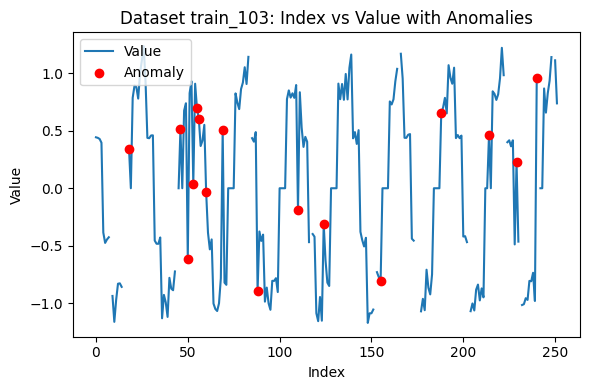

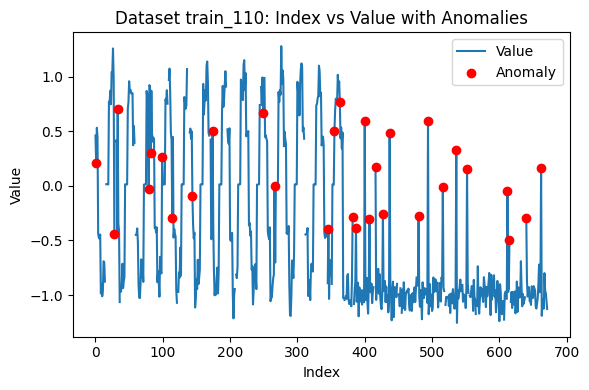

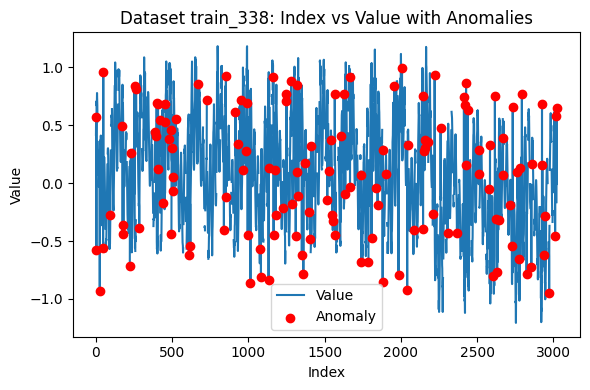

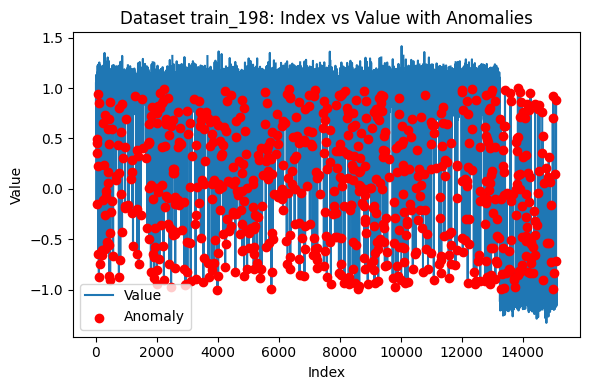

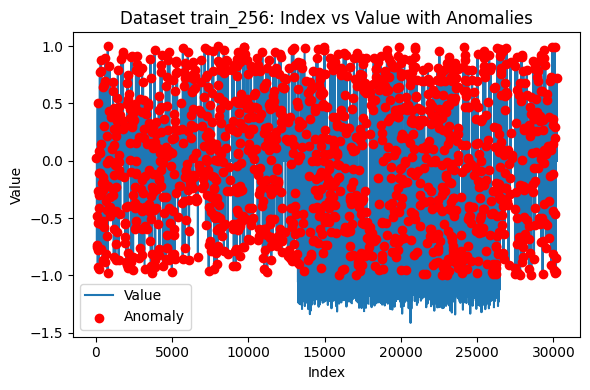

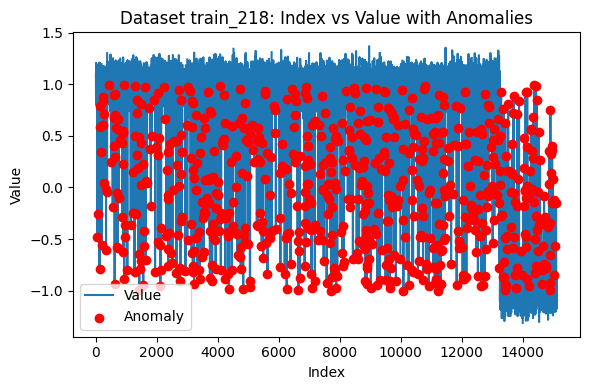

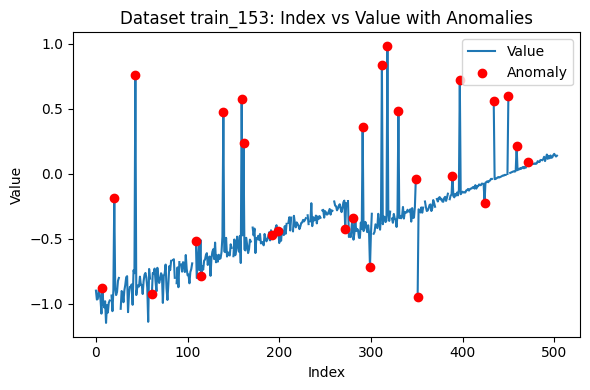

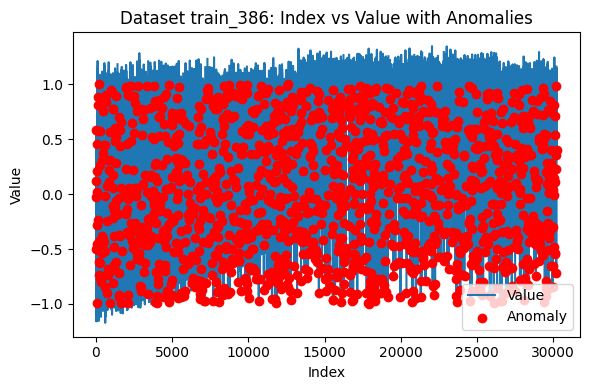

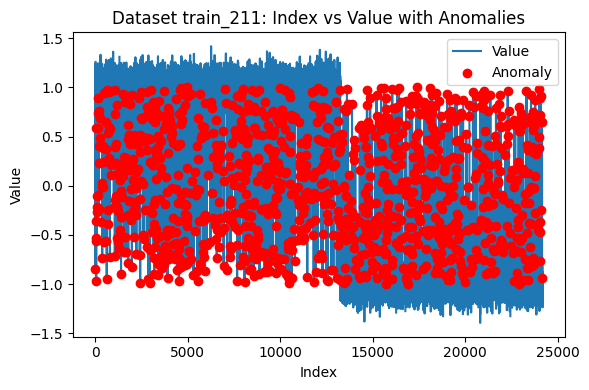

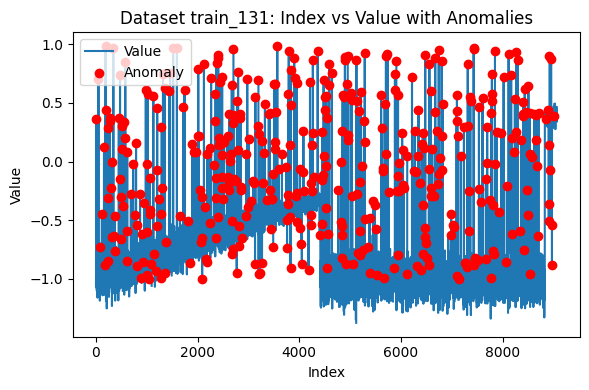

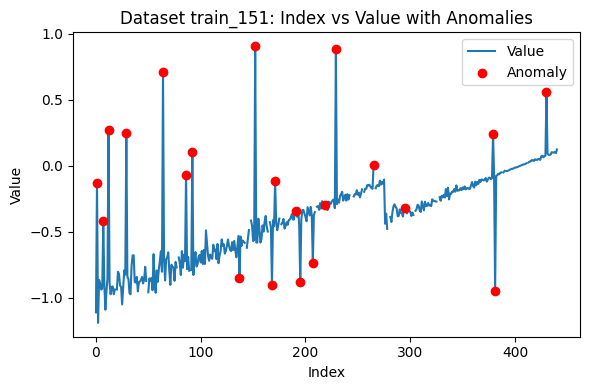

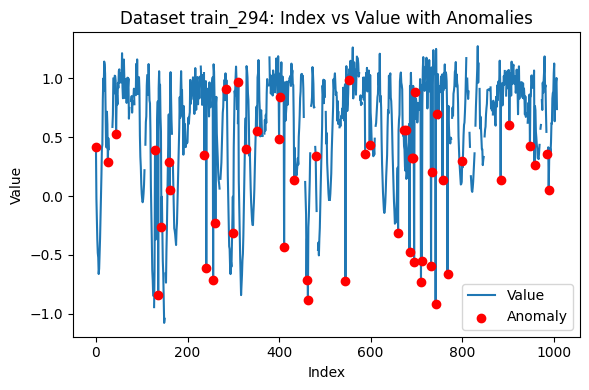

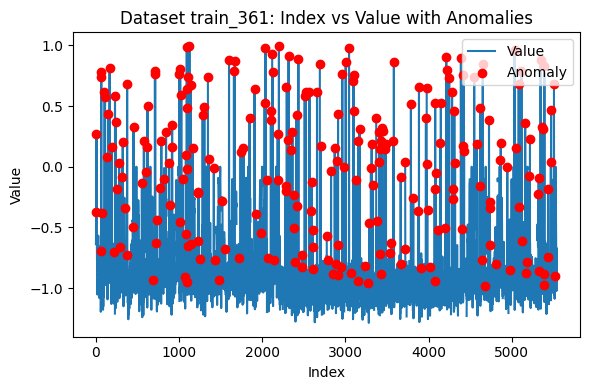

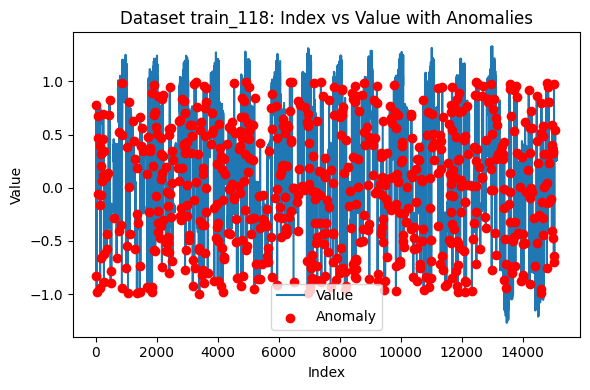

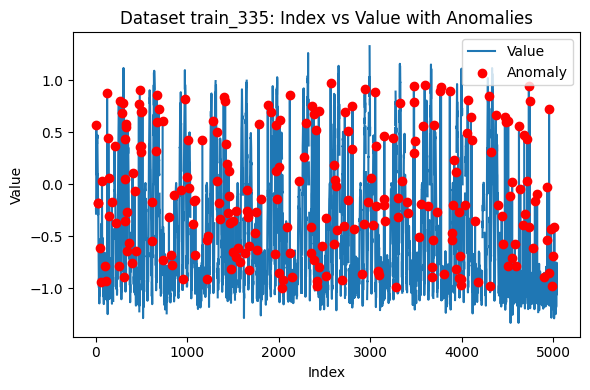

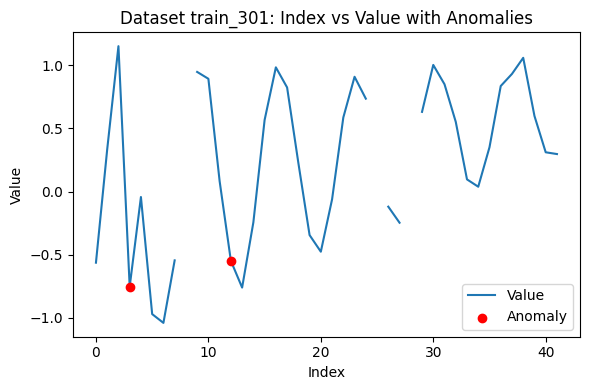

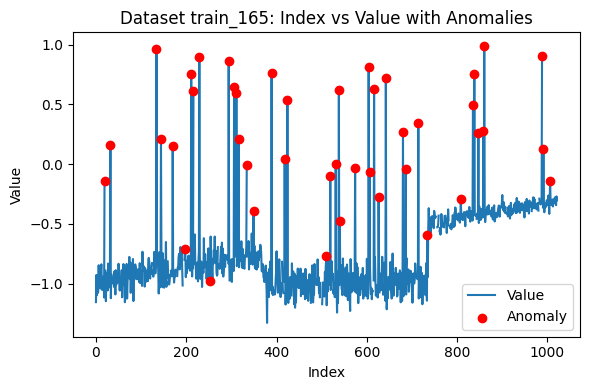

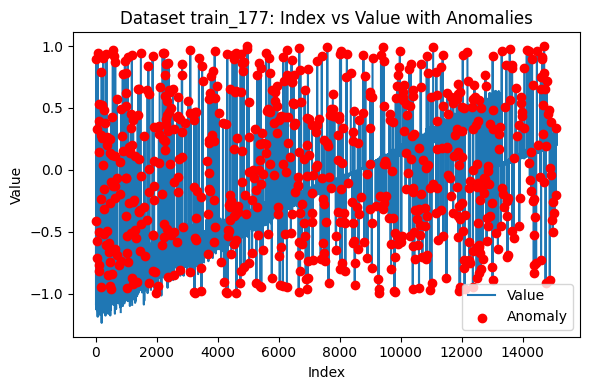

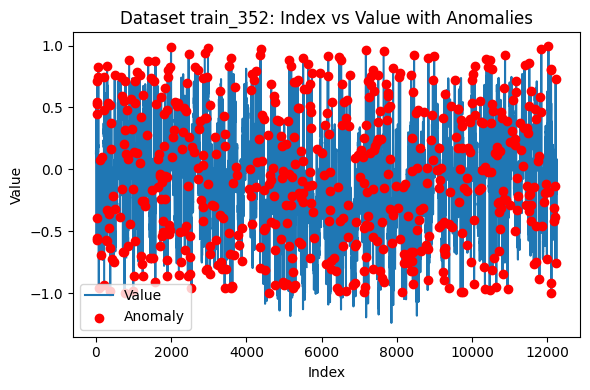

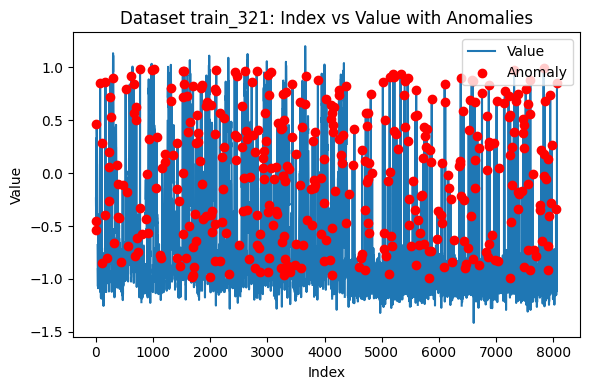

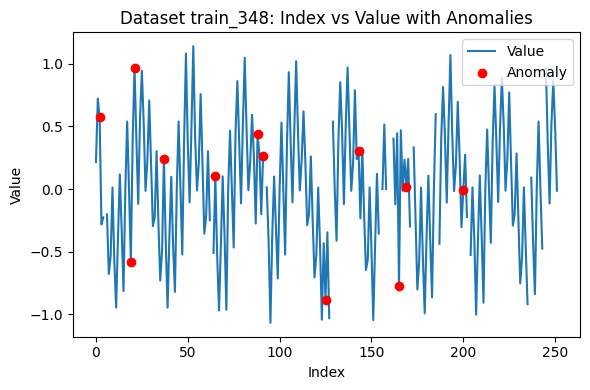

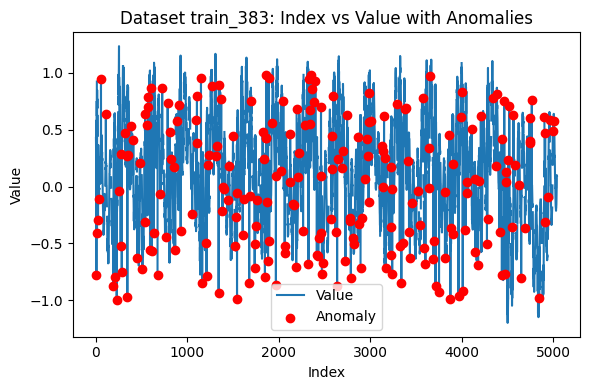

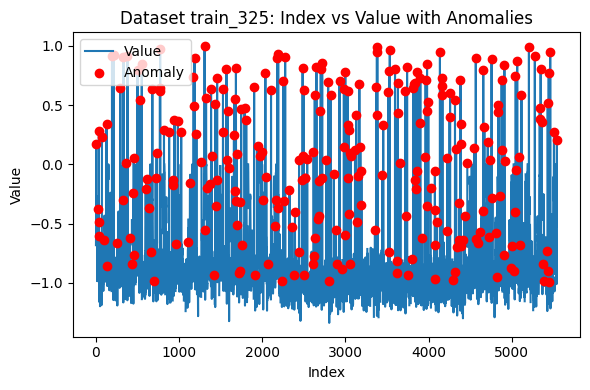

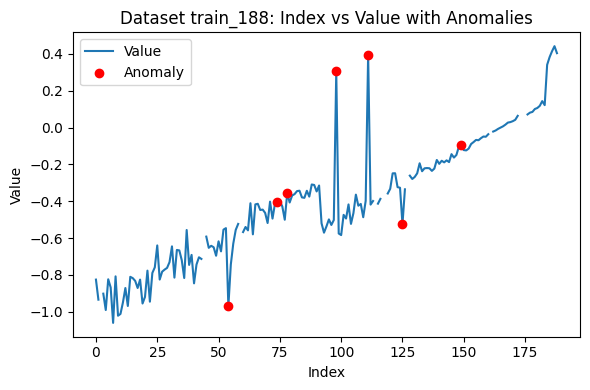

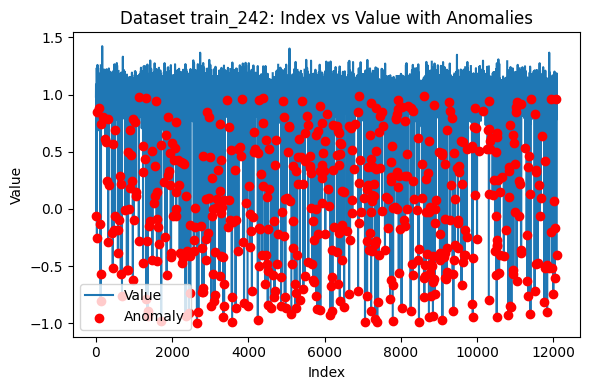

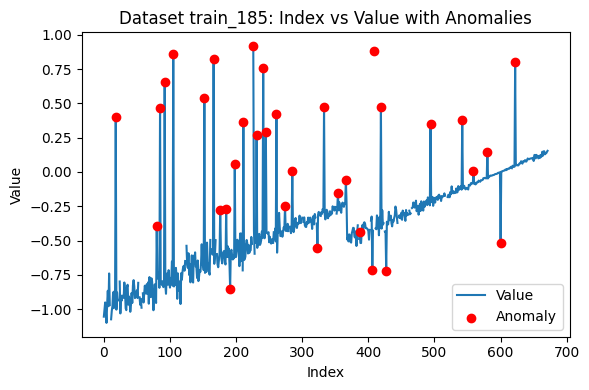

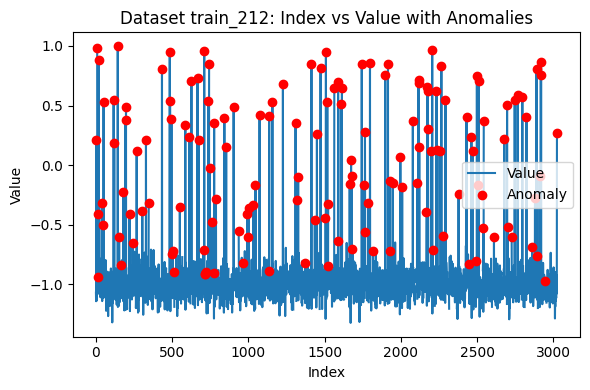

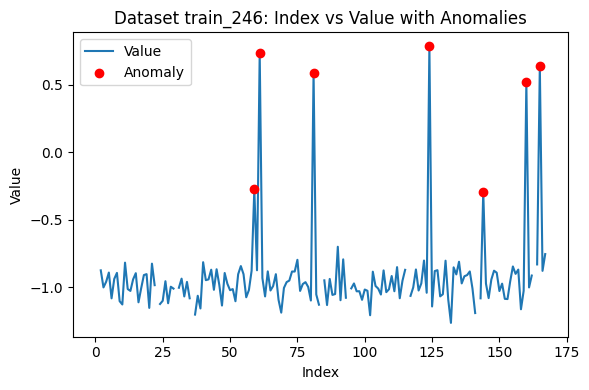

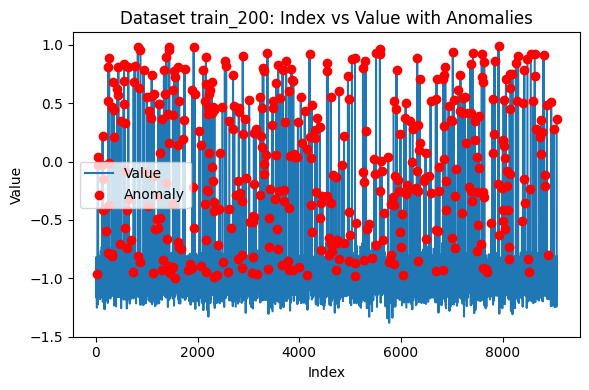

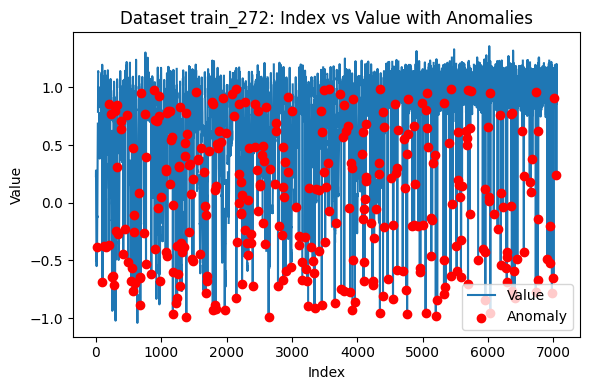

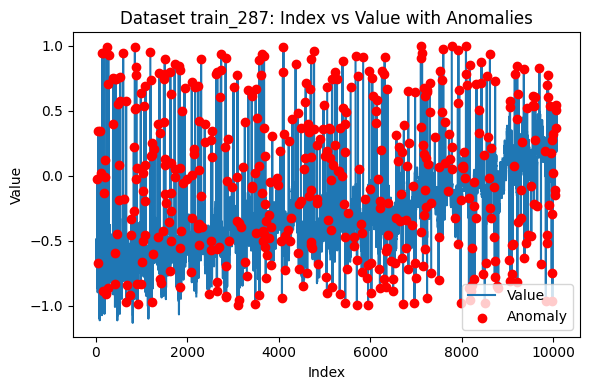

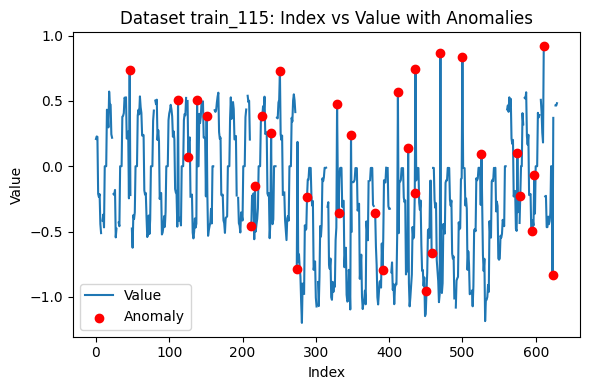

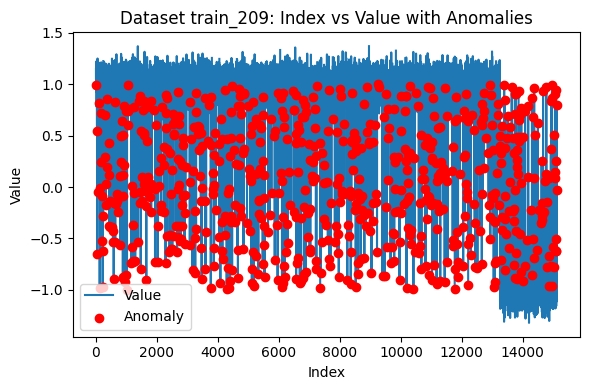

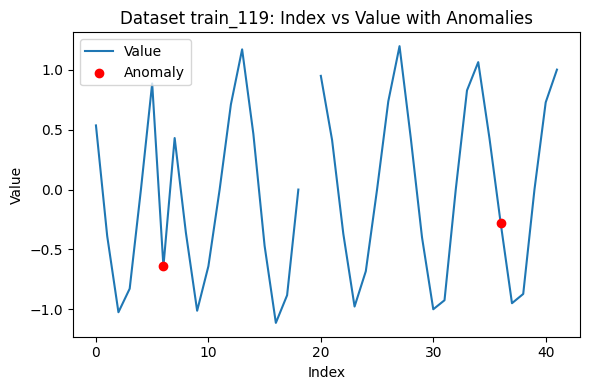

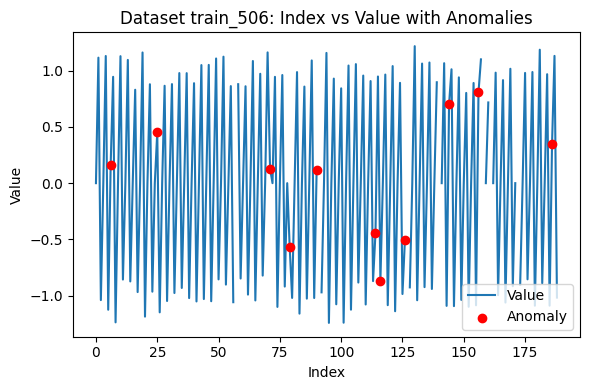

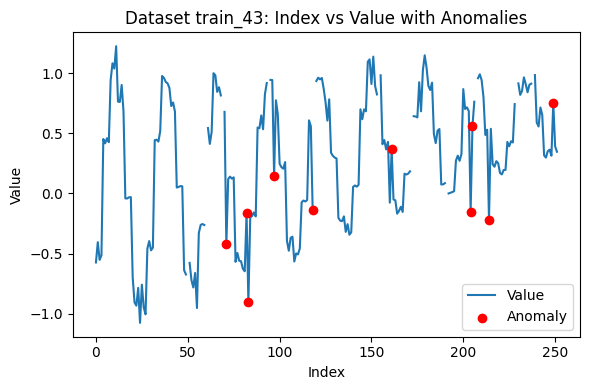

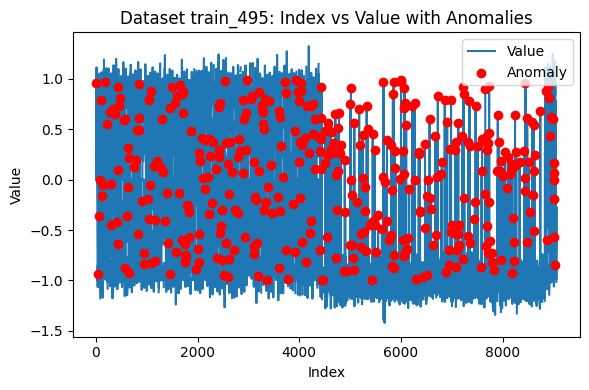

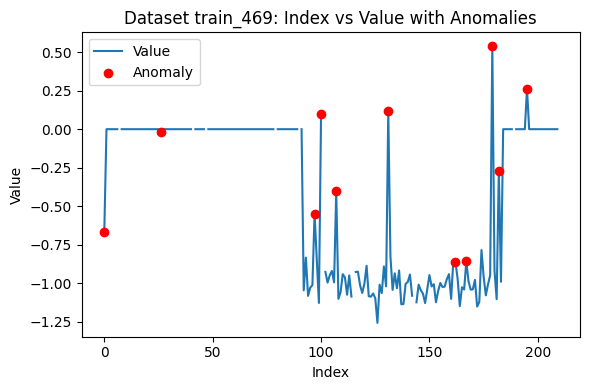

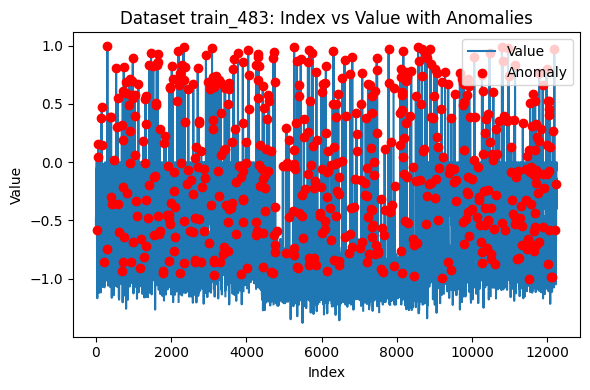

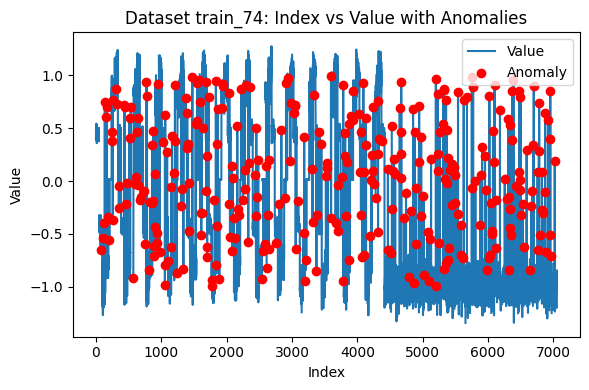

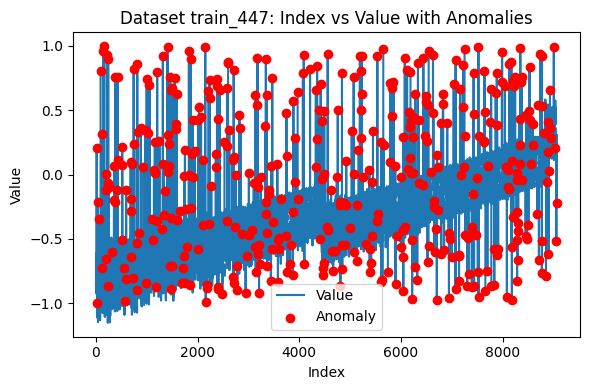

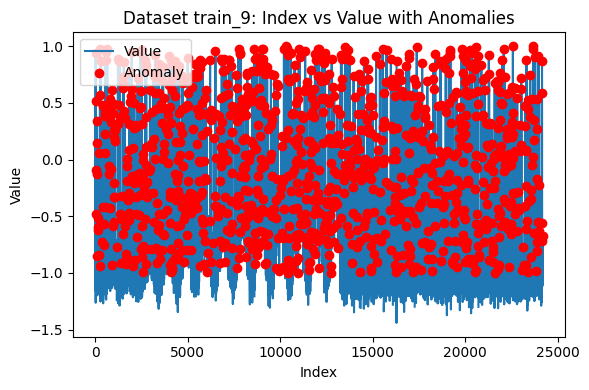

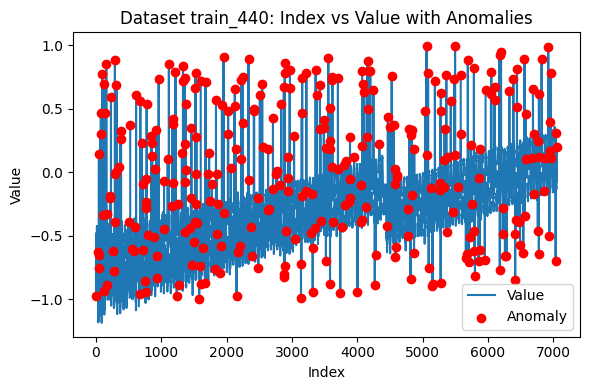

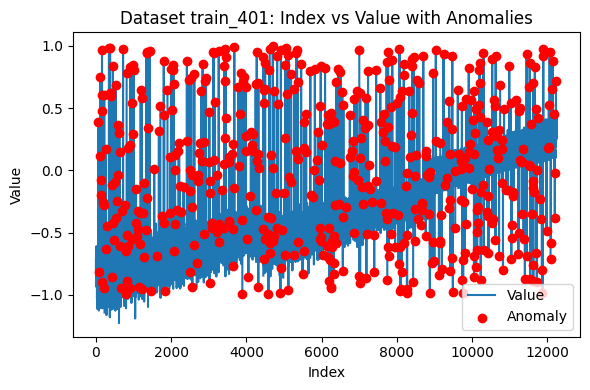

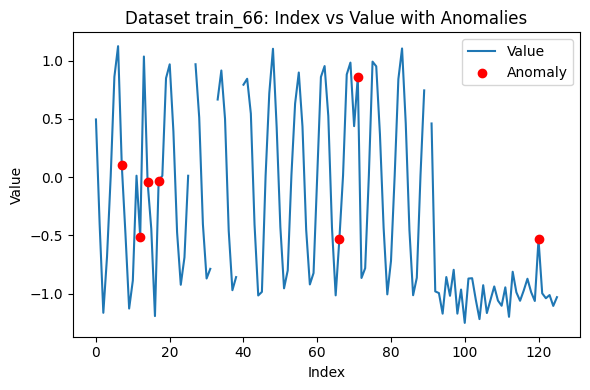

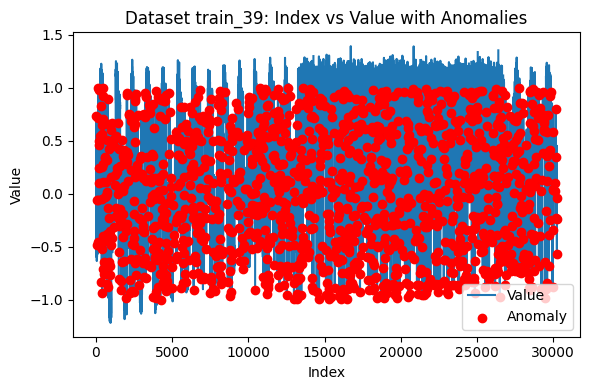

In [14]:
import matplotlib.pyplot as plt

# Loop over the datasets and check if 'anomaly' column exists
for dataset_id, df in dataframes.items():
    if 'anomaly' in df.columns:
        plt.figure(figsize=(6, 4))

        # Plot the values, using the index as the x-axis
        plt.plot(df.index, df['value'], label='Value')

        # Highlight anomalies with a different marker
        anomalies = df[df['anomaly'] == 1]
        plt.scatter(anomalies.index, anomalies['value'], color='red', label='Anomaly', zorder=5)

        # Set title and labels
        plt.title(f"Dataset {dataset_id}: Index vs Value with Anomalies")
        plt.xlabel('Index')
        plt.ylabel('Value')

        # Add a legend
        plt.legend()

        # Show the plot
        plt.tight_layout()
        plt.show()

# Preprocessing the Datasets

Acorrding to my analysis:
1. Some datasets have the timestamp as date only, time not included
2. 46/96 datasets have the col anomaly
3. other datasets may have outliers that shall be detected and handled
4. There are NaN values that should be handled
5. Datasets have different row sizes thus each should have variable window size/lags

In [18]:
class TimeSeriesPreprocessor:
    def __init__(self, outlier_threshold: float = 3.0):
        self.selected_lags = {}
        self.outlier_threshold = outlier_threshold
    def detect_outliers(self, series: pd.Series) -> pd.Series:
        """
        Detect outliers using z-score method.
        Returns a boolean series where True indicates an outlier.
        """
        z_scores = np.abs(zscore(series, nan_policy='omit'))
        return z_scores > self.outlier_threshold

    def handle_outliers(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Handle outliers in the dataset, either using explicit anomaly labels
        or detecting them using statistical methods.
        """
        df = df.copy()

        if 'anomaly' in df.columns:
            # Use explicit anomaly labels
            df.loc[df['anomaly'], 'value'] = np.nan
        else:
            # Detect outliers using z-score method
            outliers = self.detect_outliers(df['value'])
            df.loc[outliers, 'value'] = np.nan

        return df

    def standardize_timestamp(self, df: pd.DataFrame) -> pd.DataFrame:
        df = df.copy()
        if 'timestamp' in df.columns:
            df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
        return df

    def handle_missing_values(self, df: pd.DataFrame) -> pd.DataFrame:
        # First try linear interpolation
        df = df.interpolate(method='linear')

        # For any remaining NaNs at the edges, use forward and backward fill
        df = df.ffill()
        df = df.bfill()

        return df

    def select_significant_lags(self, series: pd.Series, max_lags: int = 50, threshold: float = 0.1) -> List[int]:
        try:
            # Calculate PACF values
            pacf_values, confidence_intervals = pacf(series.dropna(), nlags=max_lags, alpha=0.05)

            # Find significant lags (excluding lag 0)
            significant_lags = [
                i for i in range(1, len(pacf_values))
                if abs(pacf_values[i]) > threshold
            ]

            # If no significant lags found, return at least lag 1
            if not significant_lags:
                return [1]

            return sorted(significant_lags)

        except Exception as e:
            print(f"Error in PACF calculation: {str(e)}")
            # Fallback to default lag 1 if PACF calculation fails
            return [1]

    def create_features(self, df: pd.DataFrame, dataset_id: str, n_lags: Optional[int] = None, drop_na: bool = True) -> Tuple[pd.DataFrame, List[str]]:
        features = []

        # Use PACF to select significant lags if n_lags not provided
        if n_lags is None:
            max_possible_lags = min(int(len(df) * 0.2), 50)  # Consider up to 20% of data points or max 50
            significant_lags = self.select_significant_lags(
                df['value'],
                max_lags=max_possible_lags,
                threshold=0.1
            )
            self.selected_lags[dataset_id] = significant_lags
            print(f"Selected significant lags for dataset {dataset_id}: {significant_lags}")
        else:
            significant_lags = list(range(1, n_lags + 1))
            self.selected_lags[dataset_id] = significant_lags

        # Create lag features only for significant lags
        for lag in significant_lags:
            lag_col = f'lag_{lag}'
            df[lag_col] = df['value'].shift(lag)
            features.append(lag_col)

        # Add time-based features
        df['hour'] = df['timestamp'].dt.hour
        df['day_of_week'] = df['timestamp'].dt.dayofweek
        df['month'] = df['timestamp'].dt.month
        df['day_of_year'] = df['timestamp'].dt.dayofyear
        df['is_weekend'] = df['timestamp'].dt.weekday >= 5
        features.extend(['hour', 'day_of_week', 'month', 'day_of_year', 'is_weekend'])

        if drop_na:
            df = df.dropna()

        return df, features

    # def get_dynamic_window_size(self, df: pd.DataFrame, min_window_size: int = 5, max_window_size: int = 50, window_percentage: float = 0.05) -> int:
    #     window_size = int(len(df) * window_percentage)
    #     window_size = max(min_window_size, window_size)
    #     window_size = min(max_window_size, window_size)
    #     return window_size

    # def add_rolling_features(self, df: pd.DataFrame, min_window_size: int = 5, max_window_size: int = 50, window_percentage: float = 0.05) -> pd.DataFrame:
    #     window_size = self.get_dynamic_window_size(df, min_window_size, max_window_size, window_percentage)

    #     df[f'rolling_mean_{window_size}'] = df['value'].rolling(window=window_size).mean()
    #     df[f'rolling_std_{window_size}'] = df['value'].rolling(window=window_size).std()
    #     df[f'rolling_min_{window_size}'] = df['value'].rolling(window=window_size).min()
    #     df[f'rolling_max_{window_size}'] = df['value'].rolling(window=window_size).max()
    #     df[f'rolling_median_{window_size}'] = df['value'].rolling(window=window_size).median()
    #     df[f'rolling_sum_{window_size}'] = df['value'].rolling(window=window_size).sum()

    #     df = df.bfill().ffill()

    #     return df

    def preprocess(self, df: pd.DataFrame, dataset_id: str, n_lags: Optional[int] = None) -> Tuple[pd.DataFrame, List[str]]:
        # My preprocessing pipeline
        df = self.standardize_timestamp(df)
        df = self.handle_outliers(df) 
        df = self.handle_missing_values(df)
        df, features = self.create_features(df, dataset_id, n_lags)
        # df = self.add_rolling_features(df)

        return df, features

My **TimeSeriesPreprocessor**:
1. Converts the 'timestamp' column to datetime format.
2. Handles Missing Values:
   - Interpolates missing values using linear interpolation.
   - Fills any remaining missing values at the start and end of the series using forward fill and backward fill.
3. Outlier Detection and Handling:
   - Uses z-score method for detecting outliers and marks those as NaN in the 'value' column.
   - If explicit anomaly labels exist in the dataset, these are used instead for marking anomalies.
4. Uses PACF to select significant lags for time series data or defaults to a range if not provided.
5. Adds lag features for selected significant lags and time-based features (hour, day, month, is_weekend).

I tried adding rolling window statistics (mean, std, min, max, median, sum) based on a dynamic window size, but actually i got worse results with certain datasets so i decided on just using outlier handling + PACF since they gave me better results.

It combines all preprocessing steps (timestamp standardization, handling outliers, missing value handling, feature creation, and rolling feature addition) into a single function which returns the final dataframe with all features (lags, time-based, and rolling) along with the list of feature names.

In [19]:
time_series_preprocessor = TimeSeriesPreprocessor()

for dataset_id, df in dataframes.items():
    # Preprocess the dataset to get features and significant lags
    df_processed, features = time_series_preprocessor.preprocess(df, dataset_id)

    # Print the significant lags for each dataset
    print(f"Selected significant lags for dataset {dataset_id}: {time_series_preprocessor.selected_lags[dataset_id]}")


Selected significant lags for dataset train_103: [1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 37, 38, 41, 45, 46, 47, 48, 49, 50]
Selected significant lags for dataset train_103: [1, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 37, 38, 41, 45, 46, 47, 48, 49, 50]
Selected significant lags for dataset train_110: [1, 5, 6, 7, 9, 10, 13, 14, 15, 17, 18, 19, 24, 25, 28, 29]
Selected significant lags for dataset train_110: [1, 5, 6, 7, 9, 10, 13, 14, 15, 17, 18, 19, 24, 25, 28, 29]
Selected significant lags for dataset train_338: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 23, 25, 26, 27, 28, 49, 50]
Selected significant lags for dataset train_338: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 23, 25, 26, 27, 28, 49, 50]
Selected significant lags for dataset train_198: [1, 2, 3, 4, 5, 6, 7]
Selected significant lags for dataset train_198: [1, 2, 3, 4, 5, 6,

# Training

I tried four different models: LinearRegression, RandomForestRegressor, GradientBoostingRegressor, and DecisionTreeRegressor and For each model i define a dictionary of hyperparameters to tune during a grid search. Each hyperparameter has a list of values that the grid search will explore.

In [20]:
def get_models_and_params():
    """Define and return the models with their parameter grids for grid search."""
    return {
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'RandomForest': {
            'model': RandomForestRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100, 200],
            }
        },
        'GradientBoosting': {
            'model': GradientBoostingRegressor(random_state=42),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.05, 0.1],
            }
        },
        'DecisionTree': {
            'model': DecisionTreeRegressor(random_state=42),
            'params': {
                'max_depth': [5, 10, 15, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'criterion': ['squared_error', 'friedman_mse']
            }
        }
    }

I used also 4 metrics to evaluate the models

In [21]:
def calculate_metrics(y_true: np.ndarray, y_pred: np.ndarray) -> Dict[str, float]:
    # Calculate multiple evaluation metrics.
    return {
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }

My below function automates the process of performing a grid search over hyperparameters for a single model using time series cross-validation and then evaluates its performance.

In [22]:
def evaluate_single_model_with_grid_search(
    model_info: Dict[str, Any],
    X: pd.DataFrame,
    y: pd.Series,
    tscv: TimeSeriesSplit
) -> Tuple[Any, Dict[str, float], Dict[str, Any]]:
   # Evaluate a single model using grid search and time series cross-validation.
    try:
        grid_search = GridSearchCV(
            estimator=model_info['model'],
            param_grid=model_info['params'],
            cv=tscv,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1,
            verbose=1
        )

        grid_search.fit(X, y)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Make predictions with the best model
        y_pred = grid_search.predict(X)
        metrics = calculate_metrics(y, y_pred)

        return best_model, metrics, grid_search.best_params_

    except Exception as e:
        warnings.warn(f"Error during model evaluation: {str(e)}")
        return None, None, None

In [23]:
def evaluate_models(X: pd.DataFrame, y: pd.Series, n_splits: int = 5) -> Tuple[Any, str, Dict[str, float], Dict[str, Any]]:
    # Evaluate all models using grid search and return the best one based on RMSE.
    models = get_models_and_params()
    best_model = None
    best_score = float('inf')
    best_model_name = ''
    best_metrics = {}
    best_params = {}

    tscv = TimeSeriesSplit(n_splits=n_splits)

    for name, model_info in models.items():
        print(f"\nEvaluating {name} with grid search...")
        model, metrics, params = evaluate_single_model_with_grid_search(model_info, X, y, tscv)

        if metrics is None:
            print(f"Skipping {name} due to evaluation error")
            continue

        print(f"Best parameters for {name}:")
        print(params)
        print("\nMetrics:")
        for metric_name, value in metrics.items():
            print(f"{metric_name}: {value:.4f}")

        # Use RMSE as the primary metric for model selection
        if metrics['RMSE'] < best_score:
            best_score = metrics['RMSE']
            best_model = model
            best_model_name = name
            best_metrics = metrics
            best_params = params

    print(f"\nBest Model: {best_model_name}")
    print("Best Model Parameters:")
    print(best_params)
    print("\nBest Model Metrics:")
    for metric_name, value in best_metrics.items():
        print(f"{metric_name}: {value:.4f}")

    return best_model, best_model_name, best_metrics, best_params

In [24]:
def train_and_save_models(
    dataframes: Dict[str, pd.DataFrame],
    preprocessor: Any,
    folder_path: str
) -> Dict[str, Dict[str, Any]]:
    # Train and save models for multiple datasets using grid search.
    results = {}
    os.makedirs(folder_path, exist_ok=True)

    for dataset_id, df in dataframes.items():
        print(f"\nProcessing dataset: {dataset_id}")
        try:
            # Preprocessing
            df, features = preprocessor.preprocess(df, dataset_id)

            # Prepare features and target
            X = df[features]
            y = df['value']

            # Evaluate and choose the best model
            best_model, best_model_name, best_metrics, best_params = evaluate_models(X, y)

            # Save the model and related information
            model_path = os.path.join(folder_path, f'{dataset_id}_{best_model_name}_model.pkl')
            model_data = {
                'model': best_model,
                'features': features,
                'metrics': best_metrics,
                'model_name': best_model_name,
                'best_params': best_params
            }
            joblib.dump(model_data, model_path)

            results[dataset_id] = {
                'model_name': best_model_name,
                'metrics': best_metrics,
                'features': features,
                'model_path': model_path,
                'best_params': best_params
            }

            print(f'Model saved successfully: {model_path}')

        except Exception as e:
            print(f"Error processing dataset {dataset_id}: {str(e)}")
            results[dataset_id] = {'error': str(e)}

    return results

In [25]:
import warnings

In [26]:
preprocessor = TimeSeriesPreprocessor()
results = train_and_save_models(dataframes, preprocessor, "models")

# Print summary
for dataset_id, result in results.items():
    print(f"\nDataset: {dataset_id}")
    if 'error' in result:
        print(f"Error: {result['error']}")
    else:
        print(f"Best Model: {result['model_name']}")
        print("Metrics:")
        for metric_name, value in result['metrics'].items():
            print(f"{metric_name}: {value:.4f}")

Streaming output truncated to the last 5000 lines.
Selected significant lags for dataset train_325: [1, 2, 4, 5, 6, 11, 12, 13, 14, 15, 16, 17, 18]

Evaluating LinearRegression with grid search...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for LinearRegression:
{'fit_intercept': False, 'positive': False}

Metrics:
MSE: 0.0112
RMSE: 0.1059
MAE: 0.0819
R2: 0.8418

Evaluating RandomForest with grid search...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for RandomForest:
{'n_estimators': 200}

Metrics:
MSE: 0.0011
RMSE: 0.0335
MAE: 0.0256
R2: 0.9842

Evaluating GradientBoosting with grid search...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for GradientBoosting:
{'learning_rate': 0.1, 'n_estimators': 50}

Metrics:
MSE: 0.0081
RMSE: 0.0901
MAE: 0.0696
R2: 0.8854

Evaluating DecisionTree with grid search...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for DecisionT

# Saving the models

In [27]:
import os

# Define the path to the folder
folder_path = '/content/models'

# List all files in the folder and filter for .pkl files
pkl_files = [f for f in os.listdir(folder_path) if f.endswith('.pkl')]

# Count the number of .pkl files
num_pkl_files = len(pkl_files)

# Print the result
print(f"Number of .pkl files in the folder: {num_pkl_files}")


Number of .pkl files in the folder: 96


In [28]:
import shutil
import zipfile
import os

# Define the paths
source_folder = '/content/models'  # Folder to zip
destination_folder = '/content/drive/MyDrive/models_0'  # Path on Google Drive where you want to upload
zip_filename = '/content/models.zip'  # Name of the zip file

# Remove the existing folder in Google Drive before copying
if os.path.exists(destination_folder):
    shutil.rmtree(destination_folder)

# Create a zip file of the source folder
with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(source_folder):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), source_folder))

print(f"Folder zipped as {zip_filename}")

# Move the zip file to Google Drive
shutil.move(zip_filename, destination_folder)

print(f"Zipped folder uploaded to Google Drive at {destination_folder}")

Folder zipped as /content/models.zip
Zipped folder uploaded to Google Drive at /content/drive/MyDrive/models_0
